In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl


mpl.rcParams.update({
    'font.family':          'sans-serif',
    'font.sans-serif':      ['Arial'],
    'mathtext.fontset':     'custom',
    'mathtext.rm':          'Arial',
    'mathtext.it':          'Arial:italic',
    'mathtext.bf':          'Arial:bold',
    'mathtext.cal':         'Arial',        # for calligraphic if you like
})

In [3]:
df_total=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Total attention\matched_data.csv')
df_domestic=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Domestic attention\matched_data.csv')
df_foreign=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Foreign attention\matched_data.csv')

NameError: name 'abbr' is not defined

In [5]:

pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df['Country Code']=pop_df['Country Code'].apply(lambda x: x.lower())
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values

excluded_iso3_codes = [
    "IRL",  # Ireland
    "SSD",  # South Sudan
    "SDN",  # Sudan
    "COG",  # Republic of the Congo
    "COD",  # Democratic Republic of the Congo
    "GIN",  # Guinea
    "GNB",  # Guinea-Bissau
    "GNQ",  # Equatorial Guinea
    "PNG",  # Papua New Guinea
    "XKX",  # Kosovo (unofficial)
    "MNE",  # Montenegro
    "SRB",  # Serbia
    "TLS",   # Timor-Leste
    "GEO", #Georgia
    'SWZ', 
    'PRK', #North Korea
]
excluded_iso3_codes=[c.lower() for c in excluded_iso3_codes]


possible_iso=list(set(possible_countries)-set(excluded_iso3_codes))

In [6]:
df = pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df.rename(columns={'aggregated_value': 'count', 'country': 'Mention_country', 'affiliation_country': 'Aff_country'}, inplace=True)
#df=df[df['Mention_country']==df['Aff_country']]
df=df[(df['Mention_country'].isin(possible_iso))&(df['Aff_country'].isin(possible_iso))]
df = df[df['year'].isin(np.arange(2002, 2020))]
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]

CEM1=list(set(df_total['Mention_country'])-set(abbr))
CEM2=list(set(df_domestic['Mention_country'])-set(abbr))
CEM3=list(set(df_foreign['Mention_country'])-set(abbr))
mena=list(set(['are', 'bhr', 'dji', 'dza', 'egy', 'irn', 'irq', 'isr', 'jor',
       'kwt', 'lbn', 'lby', 'mar', 'omn', 'pse', 'qat', 'sau', 'syr',
       'tun', 'yem'])-set(abbr))
physical_sciences=['MATH', 'ENGI', 'PHYS', 'COMP', 'MUL']
df=df[~df['subjarea'].isin(physical_sciences)]
df=df.groupby(['year', 'Mention_country'])['count'].sum().reset_index()

df['CEM1']=df['Mention_country'].apply(lambda x: 1 if x in CEM1 else 0)
df['CEM2']=df['Mention_country'].apply(lambda x: 1 if x in CEM2 else 0)
df['CEM3']=df['Mention_country'].apply(lambda x: 1 if x in CEM3 else 0)
df['MENA']=df['Mention_country'].apply(lambda x: 1 if x in mena else 0)

df['treated']=df['Mention_country'].isin(abbr).astype(int)
df['treated_CW']=df['Mention_country'].isin(['yem', 'lby', 'syr']).astype(int)
df['treated_GO']=df['Mention_country'].isin(['egy', 'tun']).astype(int)
df['treated_GC']=df['Mention_country'].isin(['omn', 'kwt', 'bhr', 'mar','jor']).astype(int)
df['rest_of_world']=1-df['treated']


In [127]:
treated=df[df['treated']==1].groupby([ 'year'])['count'].mean()
rest_of_world=df[df['treated']==0].groupby([ 'year'])['count'].mean()
CW=df[df['treated_CW']==1].groupby([ 'year'])['count'].mean()
GO=df[df['treated_GO']==1].groupby([ 'year'])['count'].mean()
GC=df[df['treated_GC']==1].groupby([ 'year'])['count'].mean()
cem1=df[df['CEM1']==1].groupby([ 'year'])['count'].mean()
cem2=df[df['CEM2']==1].groupby([ 'year'])['count'].mean()
cem3=df[df['CEM3']==1].groupby([ 'year'])['count'].mean()
MENA=df[df['MENA']==1].groupby([ 'year'])['count'].mean()
suffix='_total'
df_complete=pd.DataFrame({'treated'+suffix:treated, 'rest_of_world'+suffix:rest_of_world,
                           'CW'+suffix:CW, 'GO'+suffix:GO,
                           'GC'+suffix:GC, 'MENA'+suffix:MENA, 'cem1'+suffix:cem1, 'cem2'+suffix:cem2, 'cem3'+suffix:cem3}, ).reset_index()

df_complete.to_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure%s_attention.csv'%suffix, index=False)

In [2]:
df_domestic_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_domestic_attention.csv')
df_foreign_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_foreign_attention.csv')
df_total_complete=pd.read_csv(r'C:\Users\Yasaman\Arab Spring Paper\Arab Spring Code\DiD analysis with matching\Attention\Figure\Figure_total_attention.csv')

In [3]:
df_full=pd.merge(df_domestic_complete, df_foreign_complete, on='year')
df_full=pd.merge(df_full, df_total_complete, on='year')

Text(0, 0.5, 'Average Scholarly attention (Governemntal changes)')

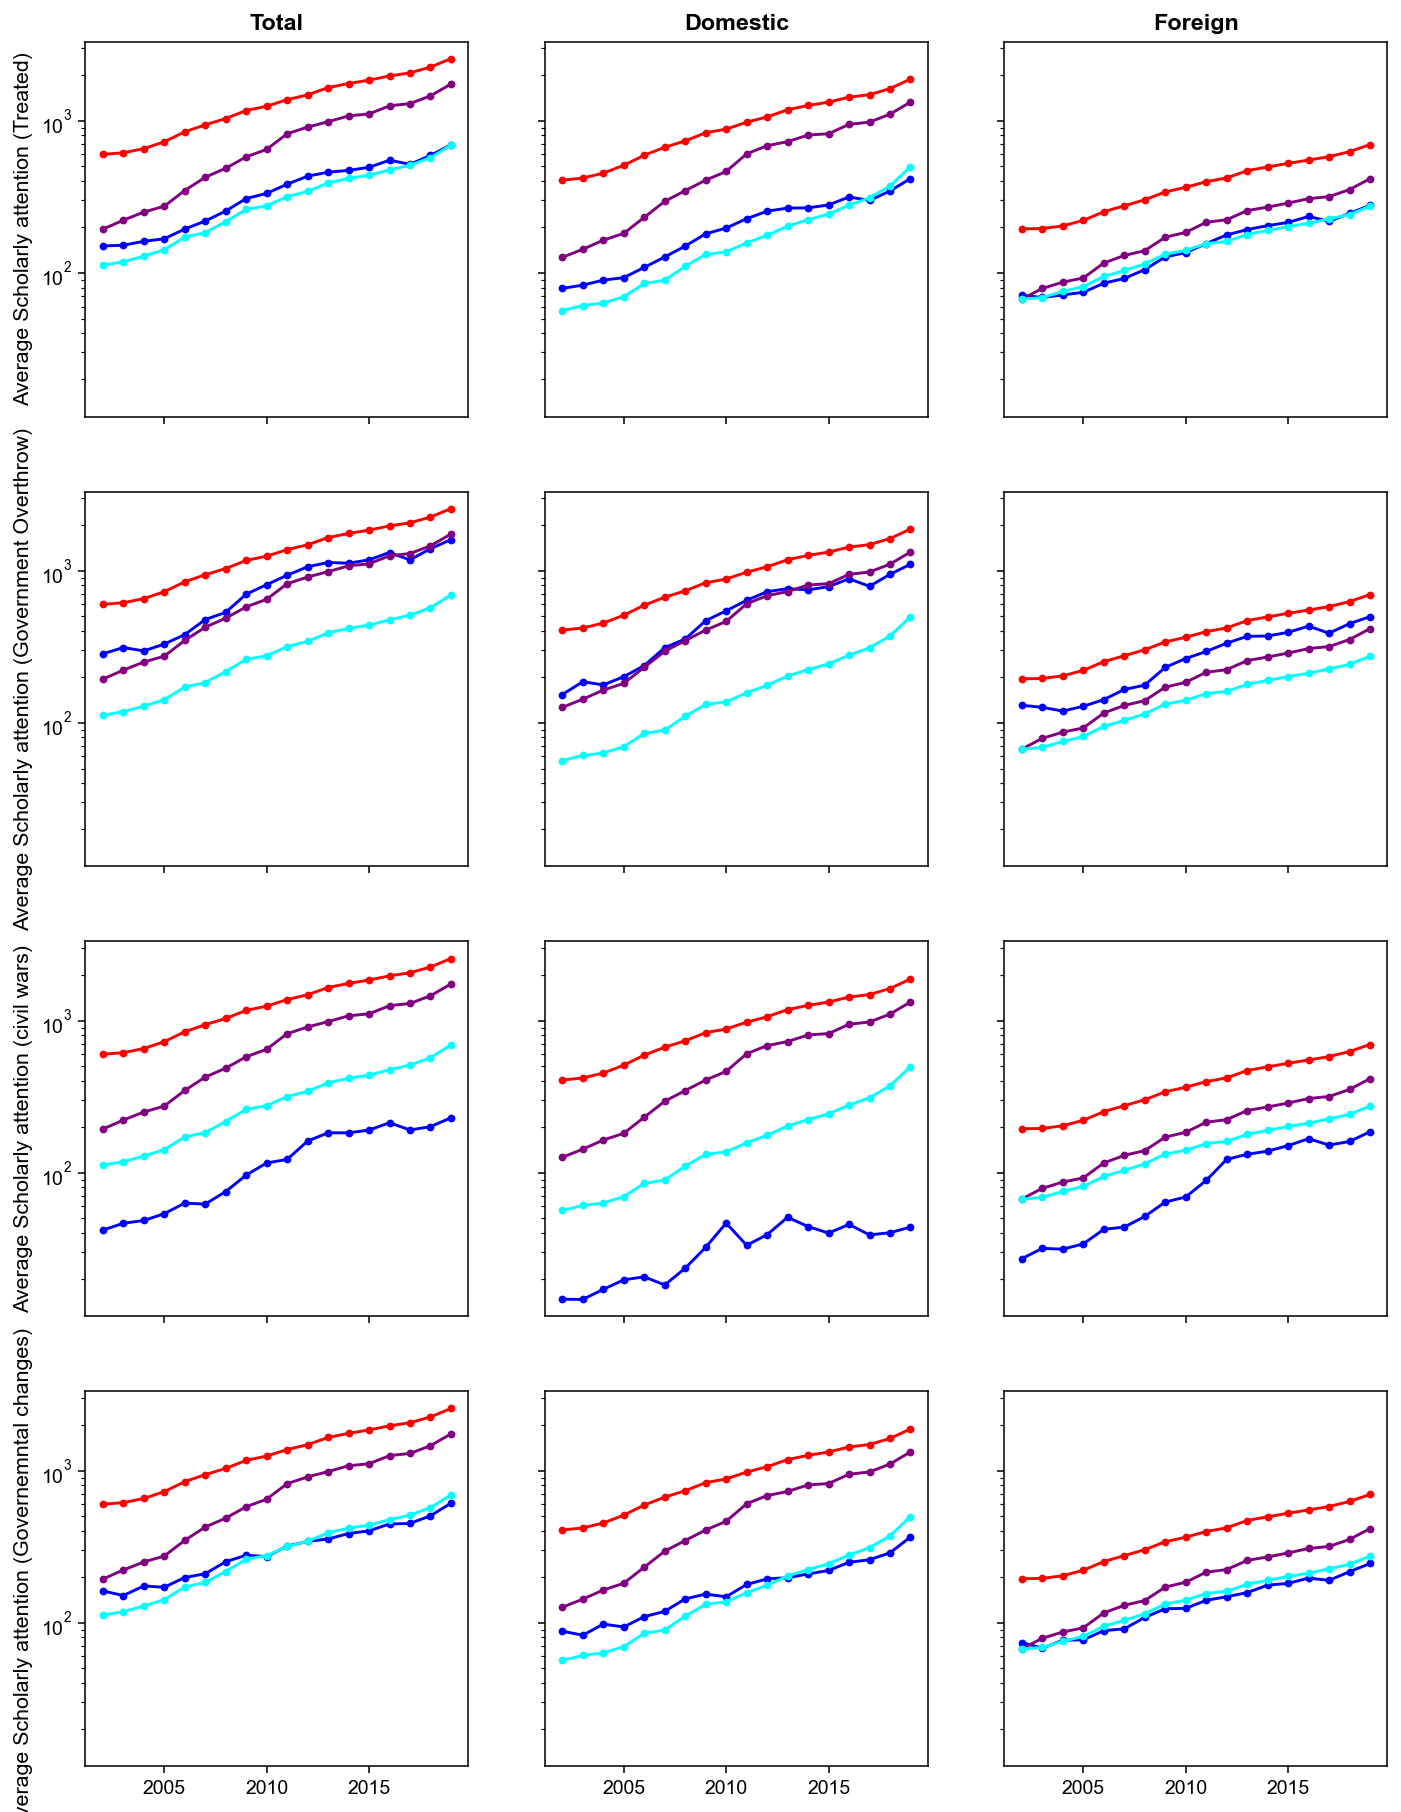

In [26]:
fig, ax = plt.subplots(figsize=(12, 16), ncols=3, nrows=4, sharex=True,  sharey=True)

for index_row, key in enumerate(['treated', 'GO', 'CW', 'GC']):
    for index_column, suffix in enumerate(['_total', '_domestic', '_foreign']):
        
        ax[index_row][index_column].plot(
            df_full['year'],
            df_full[key + suffix],
            label=key,
            color='blue',
            linestyle='-',
            marker='.'
        )
        
        ax[index_row][index_column].plot(
            df_full['year'],
            df_full['rest_of_world' + suffix],
            label='Rest of the world',
            color='red',
            linestyle='-',
            marker='.'
        )
        
        ax[index_row][index_column].plot(
            df_full['year'],
            df_full['MENA' + suffix],
            label='Rest of MENA',
            color='purple',
            linestyle='-',
            marker='.'
        )
        
        ax[index_row][index_column].plot(
            df_full['year'],
            df_full[f'cem{index_column + 1}' + suffix],
            label=f'cem{index_column + 1}',
            color='cyan',
            linestyle='-',
            marker='.'
        )
        
        ax[index_row][index_column].set_yscale('log')

ax[0][0].set_title('Total')
ax[0][1].set_title('Domestic')
ax[0][2].set_title('Foreign')

ax[0][0].set_ylabel('Average Scholarly attention (Treated)')

ax[1][0].set_ylabel('Average Scholarly attention (Government Overthrow)')

ax[2][0].set_ylabel('Average Scholarly attention (civil wars)')

ax[3][0].set_ylabel('Average Scholarly attention (Governemntal changes)')

treated
None
None
GO
None
None
CW
None
None
GC
None
None


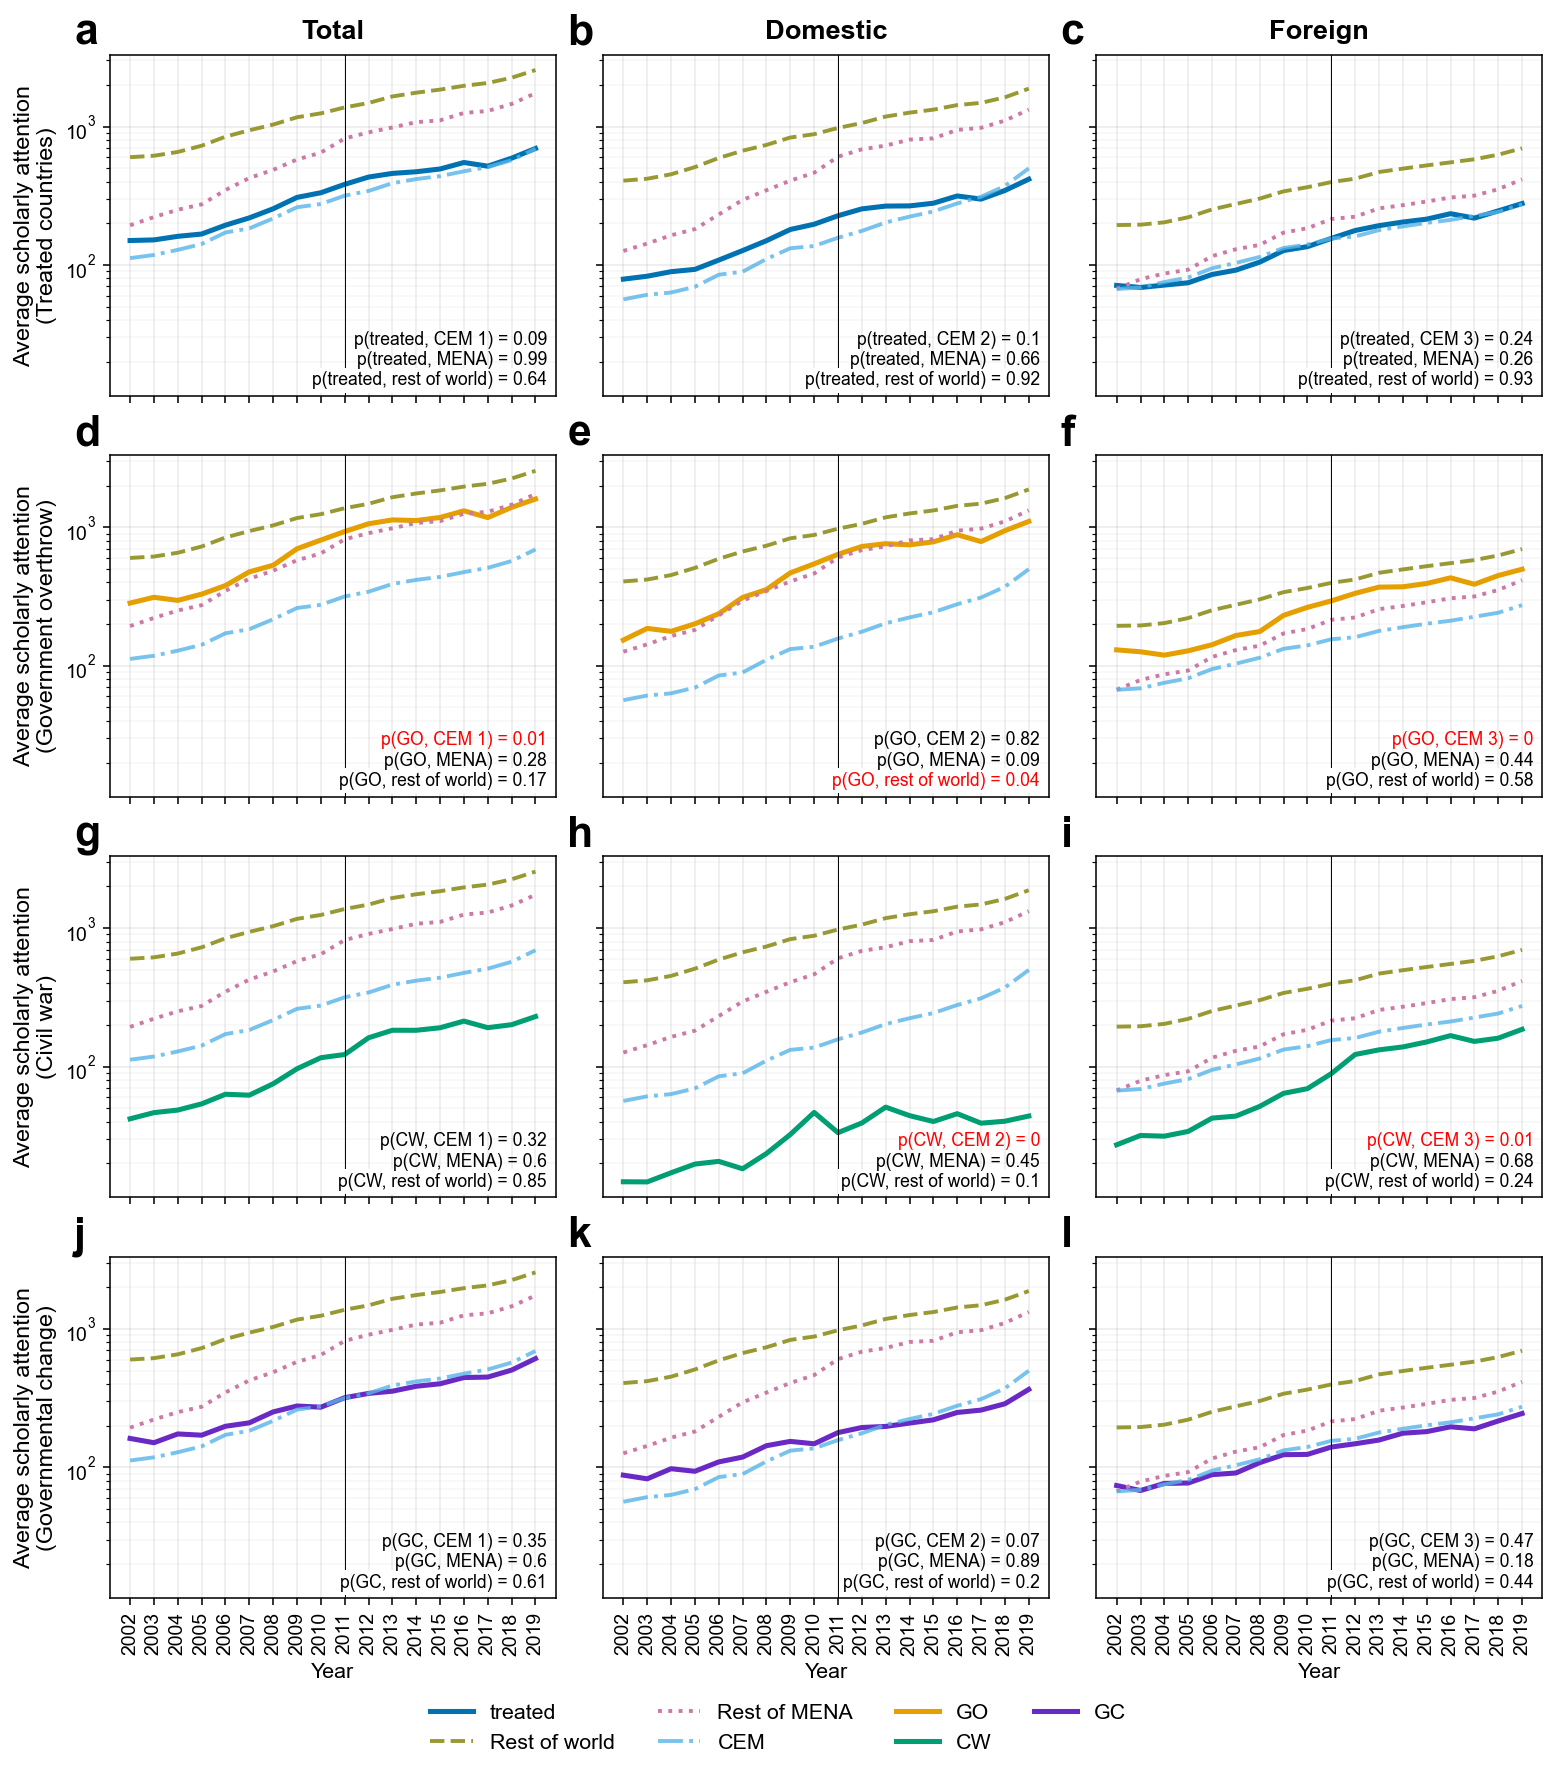

In [67]:
fig, ax = plt.subplots(
    figsize=(11, 12),
    ncols=3,
    nrows=4,
    sharex=True,
    sharey=True,
    constrained_layout=True
)

rows = ['treated', 'GO', 'CW', 'GC']
cols = ['_total', '_domestic', '_foreign']
titles = ['Total', 'Domestic', 'Foreign']
row_labels = [
    'Treated countries',
    'Government overthrow',
    'Civil war',
    'Governmental change'
]

palette = {
    "treated": "#0072B2",       # Blue
    "GO": "#E69F00",            # Orange
    "CW": "#009E73",            # Bluish green
    "GC": "#6929C4",            # Purple
    "rest_of_world": "#999933", # Olive
    "MENA": "#CC79A7",          # Reddish purple
    "cem": "#56B4E9",           # Sky blue
}

linestyles = {
    "main": "-",
    "rest": "--",
    "mena": ":",
    "cem": "-."
}

for i, key in enumerate(rows):
    for j, suffix in enumerate(cols):

        a = ax[i, j]
        print(key if j == 0 else None)
        a.plot(
            df_full['year'],
            df_full[key + suffix],
            color=palette[key],
            lw=2.6,
            linestyle=linestyles["main"],
            label=key if j == 0 else None   # label once
        )

        # Baselines
        a.plot(
            df_full['year'],
            df_full['rest_of_world' + suffix],
            color=palette['rest_of_world'],
            lw=2,
            linestyle=linestyles["rest"],
            label='Rest of world' if (i == 0 and j == 0) else None
        )

        a.plot(
            df_full['year'],
            df_full['MENA' + suffix],
            color=palette['MENA'],
            lw=2,
            linestyle=linestyles["mena"],
            label='Rest of MENA' if (i == 0 and j == 0) else None
        )

        # CEM (plot all, label only once)
        a.plot(
            df_full['year'],
            df_full[f'cem{j+1}' + suffix],
            color=palette['cem'],
            lw=2,
            linestyle=linestyles["cem"],
            alpha=0.8,
            label='CEM' if (i == 0 and j == 0) else None
        )

        a.set_yscale('log')
        a.grid(True, which='major', alpha=0.25)
        a.grid(True, which='minor', alpha=0.1)

        if i == 0:
            a.set_title(titles[j], fontsize=14, pad=8)

        if j == 0:
            a.set_ylabel(
                f'Average scholarly attention\n({row_labels[i]})',
                fontsize=12
            )

        if i==3:
            a.set_xticks(range(2002, 2020))
            a.set_xticklabels(range(2002, 2020), rotation=90)
            a.set_xlabel('Year')
        a.axvline(2011, color='k', linewidth=0.5)
        dep = dep_map[suffix]                 # suffix is "_total"/"_domestic"/"_foreign"
        pcol = pcol_map[key]                  # key is "treated"/"GO"/"CW"/"GC"
        cem_group = f"CEM {j+1}"      # j=0->(1), j=1->(2), j=2->(3)

        p_row_world = p_lookup.get((dep, "Rest of world"), {})
        p_row_mena  = p_lookup.get((dep, "Rest of MENA"), {})
        p_row_cem   = p_lookup.get((dep, cem_group), {})

        lines = [
            (f"p({key}, rest of world) = {fmt_p(p_row_world.get(pcol))}",
            p_row_world.get(pcol)),
            (f"p({key}, MENA) = {fmt_p(p_row_mena.get(pcol))}",
            p_row_mena.get(pcol)),
            (f"p({key}, {cem_group}) = {fmt_p(p_row_cem.get(pcol))}",
            p_row_cem.get(pcol)),
        ]

        y0 = 0.02          # bottom of box
        dy = 0.06          # vertical spacing between lines

        for k, (label, pval) in enumerate(lines):
            color = "red" if (pval is not None and pval < 0.05) else "black"

            a.text(
                0.98, y0 + k * dy,
                label,
                transform=a.transAxes,
                ha="right", va="bottom",
                fontsize=9,
                color=color,
                bbox=dict(
                    facecolor="white" if k == 0 else "none",  # draw box only once
                    edgecolor="none",
                    boxstyle="square,pad=0.2",
                    alpha=1
                )
            )

from collections import OrderedDict

handles = []
labels = []

for i in range(4):  # rows 0–3
    h, l = ax[i, 0].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# ---- deduplicate while preserving order ----
by_label = OrderedDict(zip(labels, handles))

fig.legend(
    by_label.values(),
    by_label.keys(),
    loc='lower center',
    ncol=4,
    frameon=False,
    fontsize=11,
    bbox_to_anchor=(0.5, -0.05)
)
import string

letters = string.ascii_lowercase
k = 0

for i in range(4):
    for j in range(3):
        ax[i, j].text(
            -0.08, 1.12,
            letters[k],
            transform=ax[i, j].transAxes,
            fontsize=22,
            fontweight='bold',
            va='top'
        )
        k += 1

fig.savefig(
    "temporal_trends.pdf",
    bbox_inches="tight"
)
plt.show()



In [56]:
import numpy as np

# map subplot column -> dependent variable label in your table
dep_map = {
    "_total":   "Log Attention",
    "_domestic":"Log Domestic Attention",
    "_foreign": "Log Foreign Attention",
}


# map subplot row -> which p-column to read
pcol_map = {
    "treated": "p_Target",
    "GO":      "p_GO",
    "CW":      "p_CW",
    "GC":      "p_GC",
}

# (dep var, control group) -> dict of p columns
p_lookup = {
    (r["Dependent Variable"], r["Control Group"]): r
    for _, r in df.iterrows()
}

def fmt_p(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return "?"
    # tweak formatting as you like:
    return f"{x:.2f}".rstrip("0").rstrip(".")


In [53]:
import pandas as pd

data = [
    # Log Attention
    ["Log Attention", "Rest of world", 0.635, 0.175, 0.855, 0.612],
    ["Log Attention", "Rest of MENA", 0.990, 0.284, 0.599, 0.600],
    ["Log Attention", "CEM 1", 0.092, 0.014, 0.317, 0.350],

    # Log Domestic Attention
    ["Log Domestic Attention", "Rest of world", 0.915, 0.042, 0.096, 0.202],
    ["Log Domestic Attention", "Rest of MENA", 0.661, 0.087, 0.452, 0.891],
    ["Log Domestic Attention", "CEM 2", 0.104, 0.816, 0.001, 0.0736],

    # Log Foreign Attention
    ["Log Foreign Attention", "Rest of world", 0.933, 0.581, 0.243, 0.436],
    ["Log Foreign Attention", "Rest of MENA", 0.255, 0.441, 0.684, 0.181],
    ["Log Foreign Attention", "CEM 3", 0.2383, 0.001, 0.007, 0.465],
]

columns = [
    "Dependent Variable",
    "Control Group",
    "p_Target",
    "p_GO",
    "p_CW",
    "p_GC",
]

df = pd.DataFrame(data, columns=columns)

df


,Dependent Variable,Control Group,p_Target,p_GO,p_CW,p_GC
0,Log Attention,Rest of world,0.6350,0.175,0.855,0.6120
1,Log Attention,Rest of MENA,0.9900,0.284,0.599,0.6000
2,Log Attention,CEM 1,0.0920,0.014,0.317,0.3500
3,Log Domestic Attention,Rest of world,0.9150,0.042,0.096,0.2020
4,Log Domestic Attention,Rest of MENA,0.6610,0.087,0.452,0.8910
5,Log Domestic Attention,CEM 2,0.1040,0.816,0.001,0.0736
6,Log Foreign Attention,Rest of world,0.9330,0.581,0.243,0.4360
7,Log Foreign Attention,Rest of MENA,0.2550,0.441,0.684,0.1810
8,Log Foreign Attention,CEM 3,0.2383,0.001,0.007,0.4650
